# Карташов ДД, ИМ17-06Б
# Метод Джарвиса

## На первом шаге алгоритма необходимо найти среди всех точек, стартовую, которая гарантированно входит в выпуклую оболочку. Выберем самую левую нижнюю точку в качестве исходной. Она точно входит в ВО.

## Далее А - это список всех точек.
## H - это список индексов точек из A, входящих в выпуклую оболочку.
## P - это список индексов точек из А, которые еще не вошли в выпуклую оболочку. + индекс начальной точки ВО, для остановки процесса.
## P[right] - это точка-кандидат на следующую точку выпуклой оболочки.
## Описание работы алгоритма ниже в коде.

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [239]:
plt.rcParams["figure.figsize"] = (10,8)

In [230]:
def Less(a1,a2):
    '''
    функция для сортировки списка точек. После сортировки первая из них станет исходной точкой выпуклой оболочки
    '''
    return (a1[1]<a2[1]) or (a1[1]==a2[1] and a1[0]<a2[0])

In [231]:
def quicksort(nums,pred):
    '''
    непосредственная сортировка по предикату
    '''
    if len(nums) <= 1:
        return nums
    else:
        q = random.choice(nums)
        s_nums = []
        m_nums = []
        e_nums = []
        for n in nums:
            if pred(n, q):
                s_nums.append(n)
            elif pred(q,n):
                m_nums.append(n)
            else:
                e_nums.append(n)
        return quicksort(s_nums,pred) + e_nums + quicksort(m_nums,pred)

In [232]:
def rotate(A,B,C):
    '''
    определяет направление поворота при переходе по точкам A -> B - > C
    '''
    return (B[0]-A[0])*(C[1]-B[1])-(B[1]-A[1])*(C[0]-B[0])

In [233]:
def jarvis(A):
    n = len(A)
    P = [i for i in range(n)] #список индексов еще не рассмотренных точек
    '''
    так как А - уже отсортированный список точек, то нижняя левая точка есть А[0]
    '''
    H = [P[0]] # добавляем эту точку в список точек оболочки
    del P[0] #и удаляем ее из рассмотрения 
    P.append(H[0]) # но добавляем её же в конец рассматриваемых точек для возможности выполнения условия остановки
    while True:
        right = 0 #кандидат на новую точку оболочки
        for i in range(1,len(P)):
            '''
            если вдруг текущий кандидат находится левее вектора, 
            который исходит из последней точки текущей оболочки в рассматриваемую i-тую точку,
            то делаем новым кандидатом рассматриваемую i-тую точку
            '''
            if rotate(A[H[-1]],A[P[right]],A[P[i]])<0:
                right = i
        
        if P[right]==H[0]: # если выйгравшая точка совпала с первой точкой среди выпуклой оболочки 
            # то заканчиваем алгоритм => оболочка построена
            break
        else:
            # иначе добавляем кандидата в список точек оболочки
            H.append(P[right]) 
            del P[right]# и удаляем его из дальнейшего рассмотрения
    return H+[H[0]] 

# Решение задачи:

In [234]:
# генерируем 20 точек из двумерного нормального распределения с матОжиданием в точке (0,0) и среднеквадратичным отклонением 10 
A = list(np.random.randn(20,2)*10)
# сортируем эти точки в лексекографическом порядке, как делали в методе цепей
A = np.array(quicksort(A,Less))

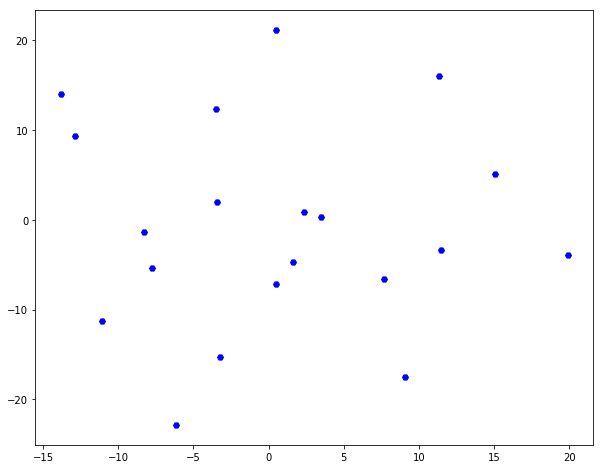

In [240]:
plt.plot(A[:,0],A[:,1],'Hb')

In [236]:
# применяем метод Джарвиса
H = jarvis(A)

In [237]:
# из списка точек выделим те, которые по мнению метода представляют собой выпуклую оболочку
Hx = A[H][:,0]
Hy = A[H][:,1]

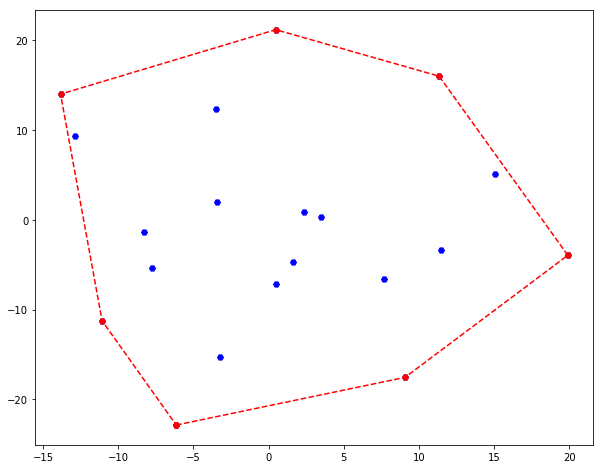

In [241]:
# рисуем точки и выпуклую оболочку, соединенную пунктиром
plt.plot(A[:,0],A[:,1],'Hb',Hx,Hy,'Hr--')